# How are in-demand skills trending for Data Analysts?

## Methology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

# Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
df = pd.read_csv(r'C:\Users\ARJUN\Python_projects\Python_Course\data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is India. Then extract the month from each job's posting date to see when jobs are listed. Next, convert a column that lists skills into a usable list format. Finally, it rearrange the data so that each skill from the list gets its own row.

In [2]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_IND['job_posted_month_number'] = df_DA_IND['job_posted_date'].dt.month

# Explode job_skills column
df_DA_IND_exploded = df_DA_IND.explode('job_skills')

# Pivot in Prep for Plotting

Create a pivot table from the 'df_DA_IND_exploded', setting 'month' as the index, job_skills as the columns, and fill missing entries with zero.

In [3]:
df_DA_IND_pivot = df_DA_IND_exploded.pivot_table(index = 'job_posted_month_number', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()

df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending = False).index]

df_DA_IND_pivot = df_DA_IND_pivot.drop('Total')

df_DA_IND_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


# Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

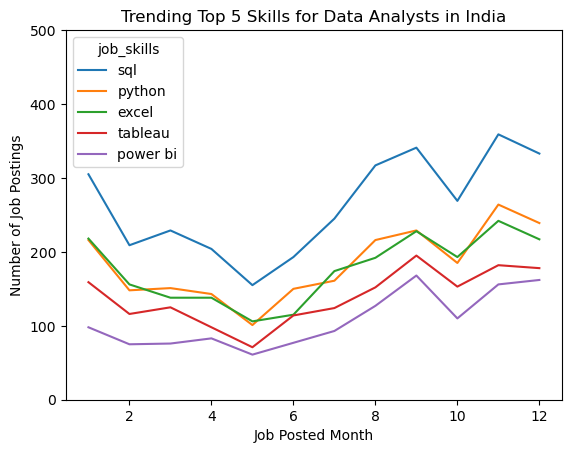

In [4]:
df_DA_IND_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Trending Top 5 Skills for Data Analysts in India')
plt.ylabel('Number of Job Postings')
plt.xlabel('Job Posted Month')
plt.ylim(0, 500)
plt.show()

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

# Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in **'df_DA_IND'** by grouping the data by **'month'** and counting the number of occurrences in each group, storing the results in **'DA_totals'**. This is needed to compute the percentages.

In [5]:
# Get monthly totals
DA_totals = df_DA_IND.groupby('job_posted_month_number').size()
DA_totals

job_posted_month_number
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing all the rows of the **'df_DA_IND_pivot'** DataFrame, which contains skill counts, by the monthly totals in **'DA_totals'** and multiplying by 100. The new DataFrame, **'df_DA_IND_pivot_percent'**, shows skill distributions as percentages of total monthly job entries.

In [6]:
# divide the rows of df_DA_IND_pivot by DA_totals
df_DA_IND_percent = df_DA_IND_pivot.div(DA_totals / 100, axis = 0)
df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# changing month number to month name
df_DA_IND_percent = df_DA_IND_percent.reset_index()

df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))

df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')

df_DA_IND_percent = df_DA_IND_percent.drop(columns = 'job_posted_month_number')

df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


# Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the **df_DA_IND_percent** DataFrame. Also the legend is moved outside of the plot for readability.

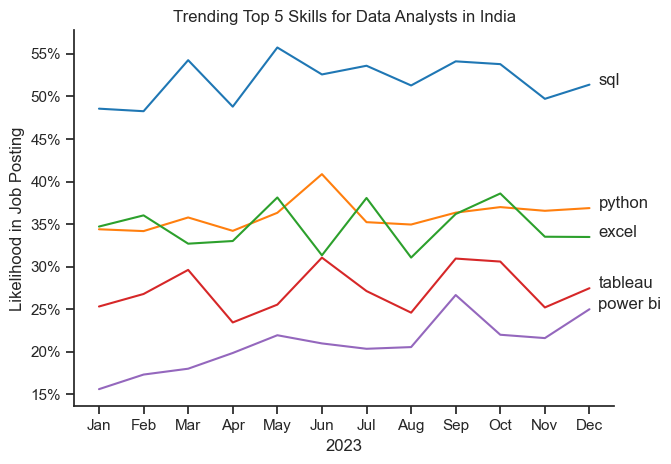

In [47]:
from matplotlib.ticker import PercentFormatter
df_plot = df_DA_IND_percent.iloc[:, :5]

sns.set_theme(style = 'ticks')
sns.lineplot(data = df_plot, dashes = False, palette = 'tab10')
sns.despine()
plt.title('Trending Top 5 Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals = 0))
plt.legend().remove()
plt.tight_layout()

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]) # for each iteration, df_plot.iloc[-1, i] will retrieve the value from the last row of a different column
    
plt.show()

# Insights
1. SQL remains consistently in high demand: Throughout 2023, SQL has been the most sought-after skill for data analysts in the US.
2. Excel is a staple skill: While not as consistently high as SQL, Excel has remained a consistently important skill throughout the year.
3. Python's popularity fluctuates: Python's popularity has seen some fluctuations, but it has generally remained a top skill, especially in the later part of the year.
4. Tableau and Power BI are valued for visualization: Both Tableau and Power BI have been consistently in demand, reflecting the importance of data visualization in data analysis.